In [1]:
# This strategy has been inspired by keeping many trades open for a big win and not closing them while making profit.
# Idea is to create an intraday strategy that takes advantage of random movements in a short time period.
# Strategy ideally gets into a trade and gets out as soon as it makes as small profit.

In [2]:
import datetime
import pandas as pd
import tstables  
import tables 
import _create_research_data as bt_input
import numpy as np

In [3]:
symbol = 'EUR_USD'
granularity = '1H'
split_ratio = 0.66

rows_train, rows_test = bt_input.split_train_test_data(symbol, granularity, split_ratio)

Observations: 63782
Training Observations: 42096
Testing Observations: 21686


In [4]:
rows_train.tail()

,ask_o,ask_h,ask_l,ask_c,bid_o,bid_h,bid_l,bid_c,volume
date,,,,,,,,,
2016-07-05 01:00:00,1.11347,1.11364,1.11260,1.11283,1.11332,1.11349,1.11244,1.11267,1499
2016-07-05 02:00:00,1.11282,1.11343,1.11260,1.11323,1.11268,1.11328,1.11245,1.11308,560
2016-07-05 03:00:00,1.11321,1.11354,1.11294,1.11332,1.11307,1.11339,1.11279,1.11319,686
2016-07-05 04:00:00,1.11334,1.11367,1.11238,1.11245,1.11320,1.11352,1.11223,1.11230,1016
2016-07-05 05:00:00,1.11248,1.11348,1.11238,1.11282,1.11232,1.11334,1.11223,1.11266,1069


In [5]:
df_train=rows_train[['bid_o','bid_h','bid_l','bid_c']]

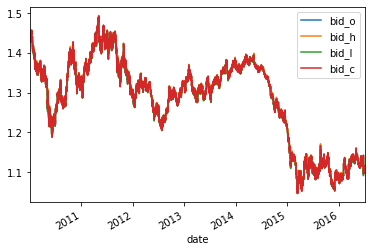

In [6]:
df_train.plot()

In [7]:
df_train.loc[:,'H-L']=df_train['bid_h']-df_train['bid_l']
df_train.loc[:,'cum-move']=df_train['H-L'].rolling(13).sum()
df_train.loc[:,'net-move']=np.abs(df_train['bid_c'] - df_train['bid_c'].shift(12))

C:\Users\bora\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\bora\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


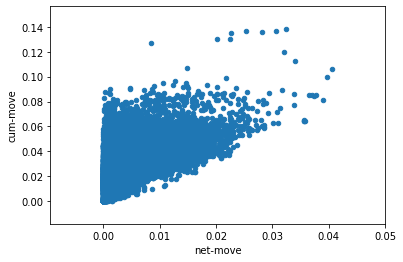

In [8]:
df_train.plot.scatter(x='net-move', y='cum-move')